In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(20.0,10.0)

#reading data 
data = pd.read_csv('headbrain.csv')
print(data.shape)


(237, 4)


In [22]:
# collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# mean x and y 
mean_x= np.mean (X)
mean_y = np.mean(Y)
 
# total number of value
n = len(X)
     
#using the formula to calciulate b1 and b2 
        
numer =0
denom =0
for i in range (n):
    numer +=(X[i]- mean_x)*(Y[i]-mean_y)
    denom +=(X[i]-mean_x)**2
b1= numer / denom 
b0= mean_y - (b1 * mean_x)
        
 #print coefficients
        
print(b1,b0) 
        

0.26342933948939945 325.57342104944223


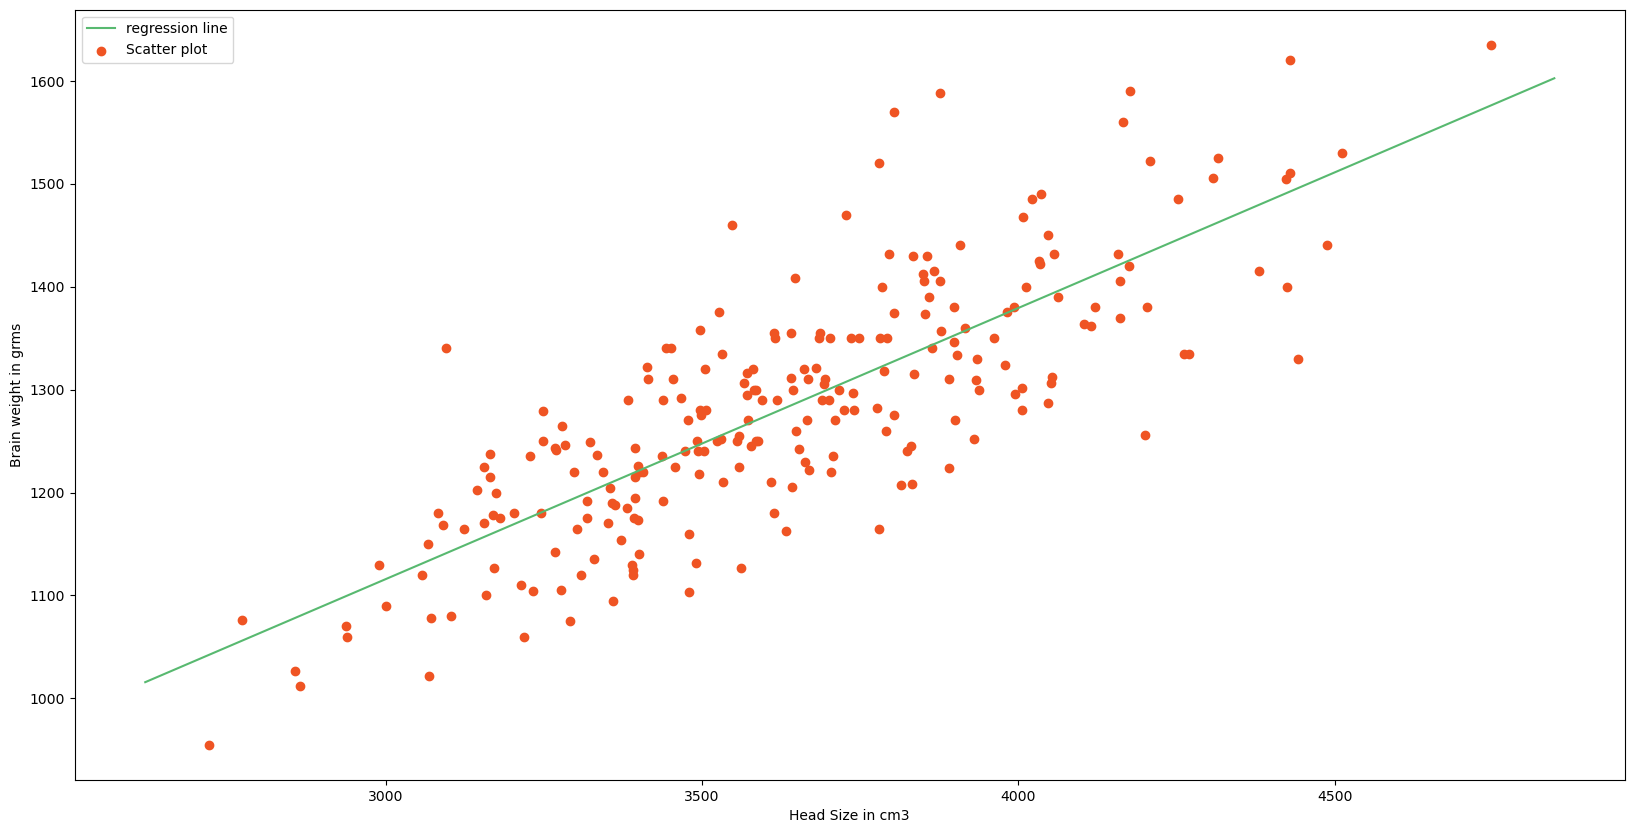

In [24]:
#plotting values and regression line 

max_x = np.max(X)+100
min_x = np.min(X)-100

#calculating line values x and y 
x= np.linspace(min_x , max_x,1000)
y =b0+ b1 * x
 
# ploting line 
plt.plot(x,y,color='#58b970', label='regression line')

#ploting scatter ponts 
plt.scatter(X,Y,c ='#ef5423', label='Scatter plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grms')
plt.legend()
plt.show ()


#compare equation of y =mx+c



In [26]:
#calculate r2 value
ss_t = 0  # total sum of square ss
ss_r = 0  # total sum of residuals 
for i in range (n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)** 2 
    ss_r += (Y[i] - y_pred)** 2
r2 = 1 -(ss_r/ss_t)  # formula 
print (r2)
 


0.6393117199570003


In [34]:
 # implement machine learning model library using scikit learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn 
X= X.reshape((n,1))

#creaating Model 
reg = LinearRegression()

#fitting training data 
reg = reg.fit(X,Y)

# y prediction 
Y_pred = reg.predict(X)

# calculating r2 score 
 r2_score = reg.score(X,Y)
 
 print (r2_score)


0.639311719957
